April 2015, J. Slavič in L. Knez

Vprašanje 1: Preštudirajte Lagrangevo polinomsko interpolacijo in pripravite funkcijo za Lagrangeve polinome. Pojasnite (z grafičnim prikazom) Lagrangeve polinome.

In [1]:
from sympy import *
init_printing()

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
X = symbols('X')

def Lagrange_pol(X, x, i):
    """Funkcija vrne Lagrangev polinom za i
    X: simbolna spremenljivka
    x: seznam podatkov (podanih točk)
    i: indeks za katerega se računa polinom
    """
    li = 1
    n = len(x)
    for j in range(n):
        if j != i:
            li = li * ( (X-x[j]) / (x[i]-x[j]) )
    return li

Narišimo sedaj polinome. Podane imamo točke:

In [3]:
x = np.array([0, 2, 3])
y = np.random.rand(3)

Glede na točke bomo potrebovali tri polinome:

In [4]:
l0 = Lagrange_pol(X,x,0)
l1 = Lagrange_pol(X,x,1)
l2 = Lagrange_pol(X,x,2)

Izračunamo in izrišemo:

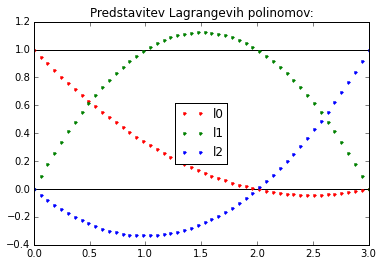

In [5]:
xint = np.linspace(np.min(x), np.max(x), 50)

yint0 = np.asarray([l0.subs(X, _) for _ in xint])
yint1 = np.asarray([l1.subs(X, _) for _ in xint])
yint2 = np.asarray([l2.subs(X, _) for _ in xint])

plt.plot([0, 3], [0, 0], 'k')    # Izrišemo črto pri vrednosti 0
plt.plot([0, 3], [1, 1], 'k')    # Izrišemo črto pri vrednosti 1
plt.plot(xint, yint0, 'r.', label='l0');
plt.plot(xint, yint1, 'g.', label='l1');
plt.plot(xint, yint2, 'b.', label='l2');
plt.legend(loc=10)
plt.title('Predstavitev Lagrangevih polinomov:');

Vprašanje 2: Definirajte funkcijo za Lagrangevo polinomsko interpolacijo. Na primeru pojasnite kako deluje.

In [6]:
# Definirajmo funkcijo
def interpolation_Lagrange(x, y):
    """ Izvede interpolacijo po Lagrangevi metodi.
    x in y predstavljata seznam podatkov (podane točke)
    """
    
    X = symbols('X')
    interpolacijski_polinom = 0.
    
    for i in range(len(x)):
        li = Lagrange_pol(X, x, i)  # Uporabimo program iz prejšnje naloge
        interpolacijski_polinom += y[i]*li
        
    return interpolacijski_polinom    

Izrišimo Lagrangeov interpolacijski polinom za podatke iz 1. vprašanja:

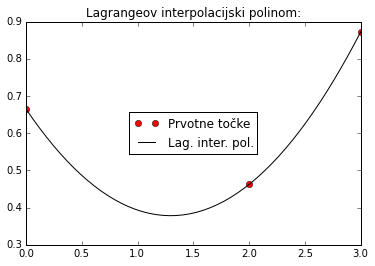

In [7]:
interpolacijski_polinom = interpolation_Lagrange(x, y)

xint = np.linspace(np.min(x), np.max(x), 50)
yint = np.asarray([interpolacijski_polinom.subs(X, _) for _ in xint])

plt.plot(x, y, 'ro', label='Prvotne točke');
plt.plot(xint, yint, 'k', label='Lag. inter. pol.');
plt.legend(loc=10)
plt.title('Lagrangeov interpolacijski polinom:');

Za lažje razumevanje narišimo še posamezne Lagrangeove polinome.

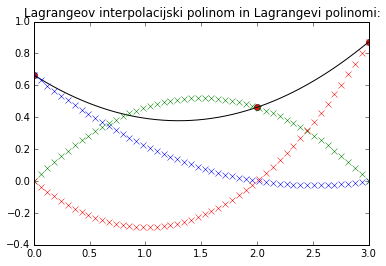

In [8]:
l = [l0, l1, l2]  # Uporabimo lagrangeove polinome iz 1. vprašanja

# Izračunamo točke
yint_pol = []
for lp, y_ in zip(l, y):
    yint_pol.append(y_ * np.asarray([lp.subs(X, _) for _ in xint]))
    
# Narišemo
plt.plot(x, y, 'ro');
plt.plot(xint, yint, 'k');
for yint_po in yint_pol:
    plt.plot(xint, yint_po, 'x')
plt.title('Lagrangeov interpolacijski polinom in Lagrangevi polinomi:');

Vprašanje 3: Pojasnite teoretično ozadje naravnih kubičnih zlepkov.

Glejte predavanje in knjigo Kiusalaas J: Numerical Methods in Engineering with Python 3, 2013, stran 120.

Vprašanje 4: Naravne kubične zlepke smo izpeljali pod pogojem, da momenta na koncu ni; včasih želim drugačne pogoje na koncih (npr. znani naklon ali znani moment). Modificirajte na predavanjih predstavljeno kodo za primer, da je na koncih moment $\ne 0$ (predpostavite neko numerično vrednost).

Funkcija za izračun koeficientov $k_i$ spremenimo. Dodako konstanti $k_0$ in $k_n$, ki sta sedaj znani. Zaradi tega se tudi ustrezno spremeni definicija vektorja b.

In [9]:
def kubicni_zlepki_koeficient(x, y, k0, kn):
    """ Vrne matriko koeficientov in konstant
    
    x in y predstavljata seznam znanih vrednosti.
    x mora biti ekvidistanten
    """
    n = len(x)
    A = np.zeros((n, n))
    _ = np.asarray([1, 4, 1])
    h = x[1]-x[0]
    for i in range(n-2):
        A[i, i:i+3] = _
    A = A[:-2, 1:-1] 
    
    b = (6/h**2)*(y[:-2] + y[2:] - 2*y[1:-1])
    # k0 in kn damo na drugo stran, sta znana
    b[0] -= k0  
    b[-1] -= kn    
    
    k = np.linalg.solve(A,b)
    return k, A, b

Rahlo se spremeni tudi funkcija zlepka:

In [10]:
def kubicni_zlepki(k, x, y, x_najdi, k0, kn):
    """ Vrne kubicni zlepek pri delitvi `xint`
    
    k: koeficienti kubičnih zlepkov
    x in y: znane vrednosti, x mora biti ekvidistanten
    x_najdi: vrednosti kjer želimo izračunati kubični zlepek
    """
    # Dodamo 0 le na začetku, kn poznamo
    _ = k.copy()
    k = np.zeros(len(k)+2)
    k[1:-1] = _
    k[0] = k0
    k[-1] = kn
    
    h = - x[1] + x[0]
    i = (x_najdi-x[0])//(-h)
    if i >= len(k)-1:
        i = len(k)-2
    out = ((x_najdi - x[i+1])**3/h - (x_najdi - x[i+1])*h)*k[i]/6.0 \
        - ((x_najdi - x[i])**3/h - (x_najdi - x[i])*h)*k[i+1]/6.0 \
        + (y[i]*(x_najdi - x[i+1]) \
        - y[i+1]*(x_najdi - x[i]))/h
    return out

Pokažimo sedaj primer iz predavanj:

In [11]:
x = np.asarray([1, 2, 3, 4, 5])
y = np.asarray([0, 1, 0, 1, 0])
k0=1
kn=100
k, A, b = kubicni_zlepki_koeficient(x, y, k0, kn)
print(A)
print(b)
k

[[ 4.  1.  0.]
 [ 1.  4.  1.]
 [ 0.  1.  4.]]
[ -13.   12. -112.]


array([ -6.33928571,  12.35714286, -31.08928571])

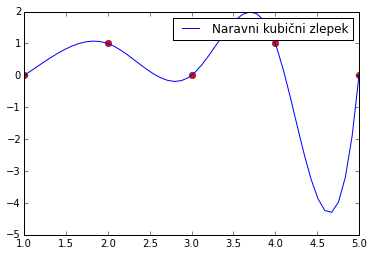

In [12]:
xint = np.linspace(np.min(x), np.max(x), 50)
yint = np.asarray([kubicni_zlepki(k, x, y, _, k0, kn) for _ in xint])
plt.plot(x, y, 'ro')
plt.plot(xint, yint, label='Naravni kubični zlepek')
plt.legend();

Vidimo, da nam vnos momentov spremeni krivuljo.

Vprašanje 5: Podatke:
    ```python
    x = np.linspace(0, 10, 10)
    y = np.random.rand(10)-0.5
    ```
  interpolirajte z uporabo ``scipy.InterpolatedUnivariateSpline``. Podatke prikažite.

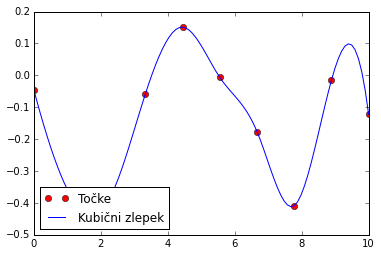

In [13]:
from scipy.interpolate import InterpolatedUnivariateSpline

x = np.linspace(0, 10, 10)
y = np.random.rand(10)-0.5

xint = np.linspace(np.min(x), np.max(x), 100)
spl = InterpolatedUnivariateSpline(x, y, k=3) 
plt.plot(x, y, 'ro', label='Točke')  # Narišemo točke
plt.plot(xint, spl(xint), label='Kubični zlepek');  # Narišemo zlepek
plt.legend(loc=3);

Vprašanje 6: Za zgoraj definirane podatke preučite pomoč in najdite vse ničle. Prikažite jih na predhodni sliki.

In [14]:
nicle = spl.roots()
nicle

array([ 3.51983632,  5.51572662,  8.93032993,  9.81755763])

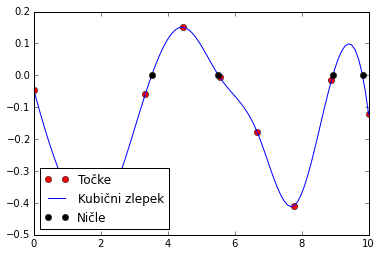

In [15]:
plt.plot(x, y, 'ro', label='Točke')  # Narišemo točke
plt.plot(xint, spl(xint), label='Kubični zlepek');  # Narišemo zlepek
plt.plot(nicle, np.zeros(len(nicle)), 'ko', label='Ničle'); # Narišemo ničle
plt.legend(loc=3);

Vprašanje 7: Za zgoraj definirani zlepek izračunajte prvi odvod in ga prikažite.

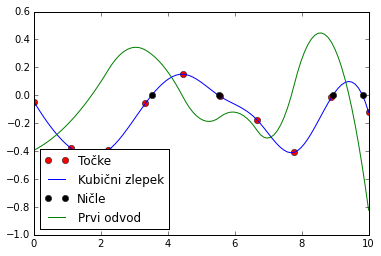

In [16]:
# Izračunajmo odvod
spl_odv_1 = spl.derivative(1)

plt.plot(x, y, 'ro', label='Točke')  # Narišemo točke
plt.plot(xint, spl(xint), label='Kubični zlepek');  # Narišemo zlepek
plt.plot(nicle, np.zeros(len(nicle)), 'ko', label='Ničle'); # Narišemo ničle
plt.plot(xint, spl_odv_1(xint), label='Prvi odvod');
plt.legend(loc=3);